In [1]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from pathlib import Path

In [2]:
cwd = Path.cwd()
def loadData(cutoff, sample_size=-1, random_state=0, repeat_cutoff=0):
    # Load data
    moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))
    #print(moondf.head())
    #print(moondf.shape)
    usedf = moondf[moondf['grade'] < cutoff]
    #print(usedf["repeats"].value_counts())
    usedf = usedf[usedf['repeats'] >= repeat_cutoff]
    usedf = usedf.drop(["is_benchmark", "repeats"], axis=1)
    #print(usedf.shape)
    if sample_size > 0:
        newdf = pd.DataFrame()
        for i in range(4, cutoff):
            #print(i)
            #print the number of samples for each grade
            #print(len(usedf[usedf['grade'] == i]))
            newdf = newdf.append(usedf[usedf['grade'] == i].sample(sample_size))
        usedf = newdf
    # shuffle data
    usedf = usedf.sample(frac=1, random_state=random_state).reset_index(drop=True)
    #print(usedf.tail())
    X = usedf.drop(['grade'], axis=1).values
    y = usedf['grade'].values
    return X, y

In [22]:
X, y = loadData(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

val_acc_list = []
train_acc_list = []
for i in range(1, 200):
    print(i)
    clf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    train_acc_list.append(clf.score(X_train, y_train))
    val_acc_list.append(clf.score(X_test, y_test))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


Text(0.5, 1.0, 'Random Forest Max Depth vs Validation Accuracy')

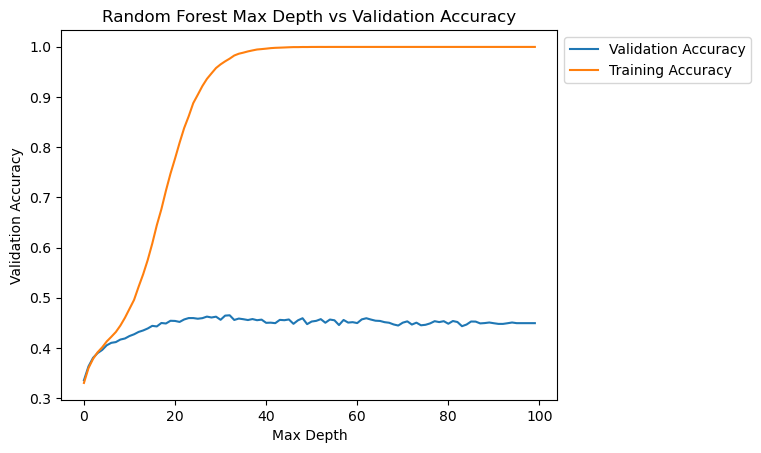

In [26]:

plt.plot(val_acc_list[:100], label="Validation Accuracy")
plt.plot(train_acc_list[:100], label="Training Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Validation Accuracy")
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title("Random Forest Max Depth vs Validation Accuracy")

In [4]:
X, y = loadData(15)#, repeat_cutoff=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.4692345356618247


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

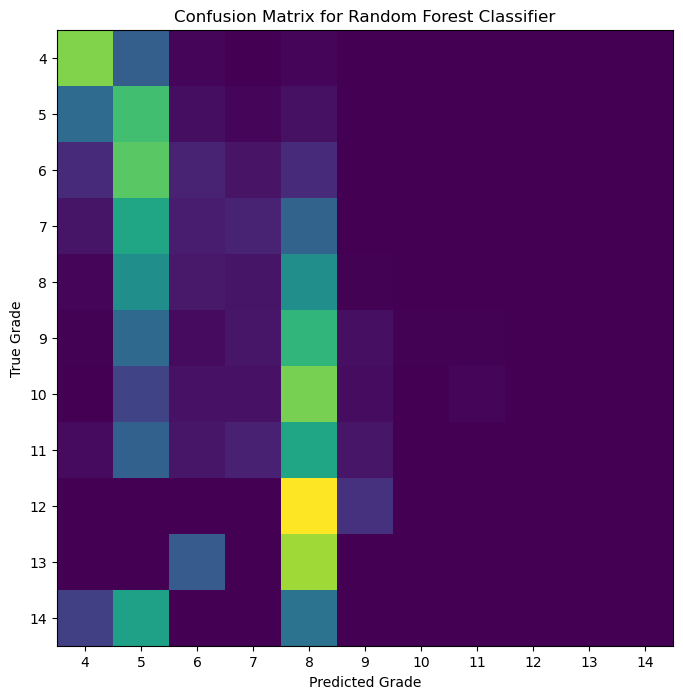

In [5]:
# print the confusion matrix
#print(pd.DataFrame(confusion_matrix(y_test, y_pred), index=clf.classes_, columns=clf.classes_))
fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm)
plt.xticks(np.arange(11), np.arange(4, 15))
plt.yticks(np.arange(11), np.arange(4, 15))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')

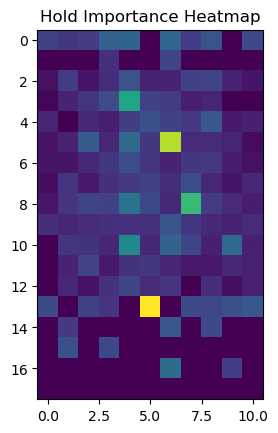

In [6]:
# Plot the feature importance
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))
importances = clf.feature_importances_

importance_map = np.zeros((11, 18))
for i in range(len(unique_holds)):
    hold = unique_holds[i]
    importance_map[hold[0], hold[1]] = importances[i]
    
plt.title('Hold Importance Heatmap')
plt.imshow(importance_map.T[::-1], interpolation='none')

In [7]:
# make the usedf have the same amount of each grade 4-8
X_eq, y_eq = loadData(9, sample_size=3000)
X_train_eq, X_test_eq, y_train_eq, y_test_eq = train_test_split(X_eq, y_eq, test_size=0.20, random_state=42)

clfeq = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

clfeq.fit(X_train_eq, y_train_eq)

y_pred_eq = clf.predict(X_test_eq)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test_eq, y_pred_eq)}")

print(pd.DataFrame(confusion_matrix(y_test_eq, y_pred_eq)))

/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_50380/1986617518.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(sample_size))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_50380/1986617518.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(sample_size))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_50380/1986617518.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newdf = newdf.append(usedf[usedf['grade'] == i].sample(sample_size))
/var/folders/yv/3g8ggfl9341blgk0mn8sq6_c0000gn/T/ipykernel_50380/1986617518.py:18: FutureWarning: The frame.append method is deprecated and

Accuracy: 0.851
     0    1    2    3    4  5  6  7
0  572   36    1    0    3  0  0  0
1   30  546    3    3    5  0  0  0
2   17  103  474    2   15  0  0  0
3    6   84   10  458   36  0  0  0
4    0   74   10    6  503  1  1  1
5    0    0    0    0    0  0  0  0
6    0    0    0    0    0  0  0  0
7    0    0    0    0    0  0  0  0


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

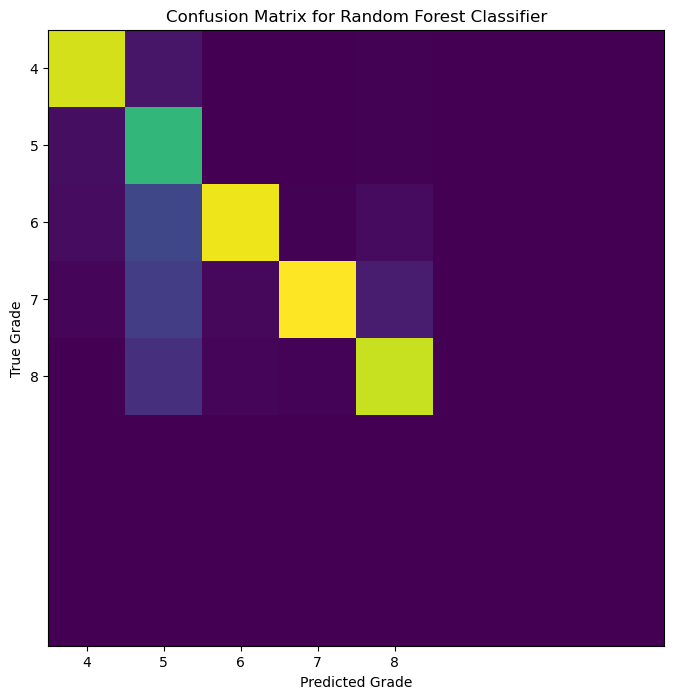

In [9]:
fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test_eq, y_pred_eq)
cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
plt.imshow(cm)
plt.xticks(np.arange(5), np.arange(4, 9))
plt.yticks(np.arange(5), np.arange(4, 9))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Random Forest Classifier')

In [18]:
# testing things
X, y = loadData(15)#, repeat_cutoff=1)
print(X.shape, y.shape)
# convert all grades 10-14 to 9
#y[y > 9] = 9
cutoff = 15
# get the 1500 of each grade for the training set
X_train = np.zeros((0, 141))
y_train = np.zeros((0))
X_rest = np.zeros((0, 141))
y_rest = np.zeros((0))
sample_size = 2400
for i in range(4, cutoff):
    if len(X[y == i])*0.8 < sample_size:
        temp_size = int(len(X[y == i]) * 0.8)
    else:
        temp_size = sample_size
    X_train = np.concatenate((X_train, X[y == i][:temp_size]))
    y_train = np.concatenate((y_train, y[y == i][:temp_size]))
    # remove those from the X and y
    X_rest = np.concatenate((X_rest, X[y == i][temp_size:]))
    y_rest = np.concatenate((y_rest, y[y == i][temp_size:]))

print(X_train.shape)
print(y_train.shape)
print(X_rest.shape)
print(y_rest.shape)
print(X.shape)
print(y.shape)
# count the number of each grade in the train
for i in range(4, cutoff):
    print(len(y_train[y_train == i]), len(y_rest[y_rest == i]))
    
# count the number of each grade in the rest

(30633, 141) (30633,)
(13385, 141)
(13385,)
(17248, 141)
(17248,)
(30633, 141)
(30633,)
2400 7753
2400 6053
2400 1645
2400 674
2400 773
848 213
311 78
144 37
40 11
23 6
19 5


In [19]:
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)
X_rest, y_rest = sklearn.utils.shuffle(X_rest, y_rest)

clf = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

clf.fit(X_train, y_train)

y_rest_pred = clf.predict(X_rest)

print(f"Accuracy: {sklearn.metrics.accuracy_score(y_rest, y_rest_pred)}")

Accuracy: 0.4732142857142857


[[5049 1659  494  270  278    3    0    0    0    0    0]
 [1561 2051 1154  671  613    3    0    0    0    0    0]
 [ 120  351  406  362  405    1    0    0    0    0    0]
 [  22   78  127  174  268    5    0    0    0    0    0]
 [  12   40   99  137  475    9    1    0    0    0    0]
 [   2    3   17   32  152    6    0    1    0    0    0]
 [   0    3    1    8   58    7    1    0    0    0    0]
 [   0    0    3    3   30    1    0    0    0    0    0]
 [   0    1    0    2    7    1    0    0    0    0    0]
 [   0    0    0    0    6    0    0    0    0    0    0]
 [   1    1    1    0    2    0    0    0    0    0    0]]


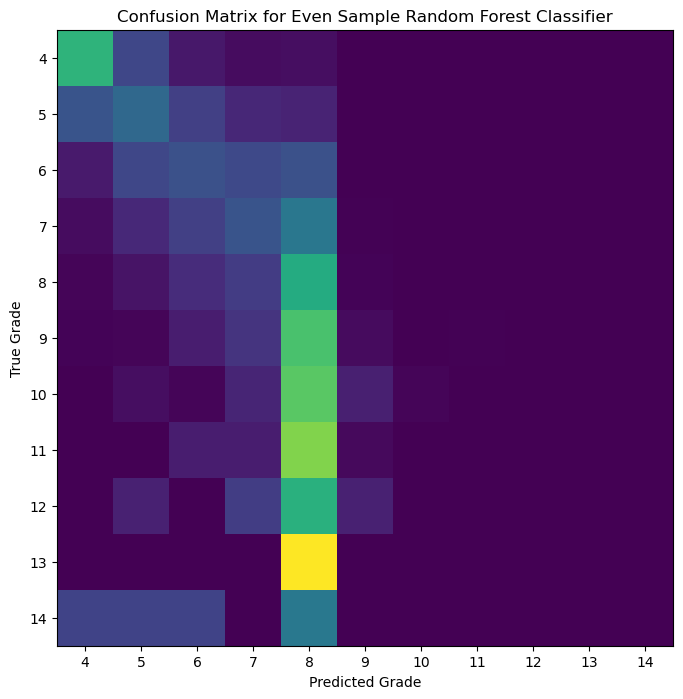

In [27]:
fig = plt.figure(figsize=(8, 8))
# calculate a confusion matrix with percentages
cm = confusion_matrix(y_rest, y_rest_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm)
#plt.imshow(confusion_matrix(y_rest, y_rest_pred))
plt.xticks(np.arange(11), np.arange(4, 15))
plt.yticks(np.arange(11), np.arange(4, 15))
plt.xlabel('Predicted Grade')
plt.ylabel('True Grade')
plt.title('Confusion Matrix for Even Sample Random Forest Classifier')
print(confusion_matrix(y_rest, y_rest_pred))